
<h5 style="text-align: center; color: #BD6C49;"> <i> Ecole Polytechnique de Thiès <br>  Département Génie Informatique et Télécommunication </i> </h5>
<h3 style="text-align: center; color: orange"> Disaster Tweets Detection 🥇 Exploratory Data Analysis </h3>
<h5 style="text-align: center; color: green"> By Kikia DIA 🤝🏾 Mouhamadou Naby DIA 🤝🏾 Ndeye Awa SALANE </h5>

<a id="0"></a> <br>
### Overview
#### [Introduction](#1)
1. [Exercice 1 La bibliothèque PIL](#2)
1. [Exercice 2 Numpy, MatplotLib](#3)
1. [Exercice 3 ScikitLearn](#4)
1. [Exercice 4 Scipy](#8)
#### [Conclusion](#5)
* <i>[References](#6)</i>
* <i>[Authors](#7)</i>

<a id="1"></a> 
#### Introduction [⏮️]()[👆🏽](#0)[⏭️](#2)

<div style="display: flex;">
     <div style="flex: 1;">
         <img src="https://storage.googleapis.com/kaggle-media/competitions/tweet_screenshot.png" alt="Descriptive Image" style="width: 100%; height:90%;">
     </div>
     <div style="flex: 
         4; padding-y: 10px; padding-left: 10px;">
         <p>
             ♻️ Twitter est devenu un important canal de communication en cas d’urgence.
             <br><br>
             ♻️ L’omniprésence des smartphones permet aux gens d’annoncer une urgence qu’ils observent en temps réel. Pour cette raison, de plus en plus d’organismes s’intéressent à la surveillance programmatique de Twitter (c.-à-d. les organisations de secours aux sinistrés et les agences de presse).
             <br><br>
             ♻️ Mais on ne sait pas toujours si les paroles d’une personne annoncent réellement un désastre (comme en témoigne l'image ci-contre).
             <br><br>
             ♻️ L’auteur utilise explicitement le mot « ABLAZE » (qui veut dire "En Feu") mais le dit métaphoriquement, ce qui est clair pour un homme dès le départ, surtout avec l’aide visuelle. Mais c’est moins clair pour une machine.
             <br><br>
             ♻️ C’est pourquoi nous avons choisis d’utiliser un modèle de langage qui prédit quels Tweets sont sur des catastrophes réelles et lesquels ne le sont pas. Nous allons utiliser à un ensemble de données de 10000 tweets qui ont été classifiés. 
         </p>
     </div>
</div>


In [1]:
# Ajouter le répertoire parent pour les imports de module
import sys
sys.path.append('..')

In [2]:
# Les logs
from src.logging.main import LoggerManager

log = LoggerManager('disaster_tweets_logging.ipynb')

In [3]:
# Importations
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import defaultdict
from collections import  Counter
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

plt.style.use('ggplot')

In [4]:
stop=set(stopwords.words('english'))

In [5]:
train = pd.read_csv('../data/processed/train.csv')
test = pd.read_csv('../data/processed/test.csv')

♻️ Affichage des trois premières lignes du dataframe pour le train et le test set

♻️ Nous avons 5 colonnes dans le train set
- 🦜 `id`: identifiant du tweet
- 🦜 `keyword`: mot-clé associé au tweet
- 🦜 `location`: la localisation depuis lequel le tweet a été publié
- 🦜 `text`: contenu du tweet
- 🦜 `target`: 0 ou 1 si le tweet est un tweet de catastrophe

In [6]:
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1


♻️ Nous avons 4 colonnes dans le test set
- 🦜 `id`: identifiant du tweet
- 🦜 `keyword`: mot-clé associé au tweet
- 🦜 `location`: la localisation depuis lequel le tweet a été publié
- 🦜 `text`: contenu du tweet
- 🦜 `target`: 0 ou 1 si le tweet est un tweet de catastrophe

In [7]:
test.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,Heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...


♻️ Nous avons `7613 entrées` dans le train set
  - 🦜 `id`: est de type int
  - 🦜 `keyword`: est de type object (string). Peut-être null (7552 non null sur 7613 soit près `99.19% de valeurs non null`)
  - 🦜 `location`: est de type object (string). Peut-être null (5080 non null sur 7613 soit `66.72% de valeurs non null`)
  - 🦜 `text`: est de type object (string)
  - 🦜 `target`: est de type int (0 ou 1)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   6278 non-null   object
 2   location  4981 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


♻️ Nous avons `3263 entrées` dans le test set
  - 🦜 `id`: est de type int
  - 🦜 `keyword`: est de type object (string)
  - 🦜 `location`: est de type object (string et peut-être null; 2158 non null sur 3263 soit `66.13% de valeurs non null`)
  - 🦜 `text`: est de type object (string)
  - 🦜 `target`: est de type int (0 ou 1)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   2659 non-null   object
 2   location  2110 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


♻️ Cela nous fait au total 10876 tweets au total

In [10]:
# Distribution of disaster and non-disaster tweets in the train set
train_distribution = train['target'].value_counts().reset_index()
train_distribution.columns = ['target', 'count']

# Plot the distribution for the train set
fig = px.bar(train_distribution, x='target', y='count', barmode='group',
             labels={'target': 'Disaster Tweet', 'count': 'Number of Tweets'},
             title='Distribution of Disaster and Non-Disaster Tweets in Train Set')
fig.show()

In [11]:
# Distribution of disaster and non-disaster tweets in the train set as a pie chart
fig_pie = px.pie(train_distribution, values='count', names='target',
                 labels={'target': 'Disaster Tweet'},
                 title='Percentage of Disaster and Non-Disaster Tweets in Train Set')
fig_pie.show()


♻️ Il y'a plus de tweets qui ne sont pas désastres  que les tweets qui sont désastres 

♻️ Non désastres: `class 0 au total 4342 soit 57%`

♻️ Désastres: `class 1 au total 3271 soit 43%`

In [12]:
# Histogram of tweet lengths for disaster and non-disaster tweets
train['text_length'] = train['text'].apply(len)

# Separate the data into disaster and non-disaster tweets
disaster_tweets = train[train['target'] == 1]
non_disaster_tweets = train[train['target'] == 0]

# Plot histograms for disaster and non-disaster tweets side by side
fig_hist = make_subplots(rows=1, cols=2, subplot_titles=('Disaster Tweets', 'Non-Disaster Tweets'))

fig_hist_disaster = px.histogram(disaster_tweets, x='text_length', barmode='overlay',
                                 labels={'text_length': 'Tweet Length'},
                                 color_discrete_sequence=['red'])
fig_hist_non_disaster = px.histogram(non_disaster_tweets, x='text_length', barmode='overlay',
                                     labels={'text_length': 'Tweet Length'},
                                     color_discrete_sequence=['green'])

for trace in fig_hist_disaster['data']:
    fig_hist.add_trace(trace, row=1, col=1)

for trace in fig_hist_non_disaster['data']:
    fig_hist.add_trace(trace, row=1, col=2)

fig_hist.update_layout(title_text='Histogram of Tweet Lengths for Disaster and Non-Disaster Tweets')
fig_hist.show()

♻️ La distribution des tweets est très similaire. 120 à 140 caractères sont les plus communs.

In [13]:
# Histogram of word lengths for disaster and non-disaster tweets
train['word_length'] = train['text'].apply(lambda x: len(x.split()))

# Separate the data into disaster and non-disaster tweets
disaster_tweets_word = train[train['target'] == 1]
non_disaster_tweets_word = train[train['target'] == 0]

# Plot histograms for disaster and non-disaster tweets side by side
fig_hist_word = make_subplots(rows=1, cols=2, subplot_titles=('Disaster Tweets', 'Non-Disaster Tweets'))

fig_hist_disaster_word = px.histogram(disaster_tweets_word, x='word_length', barmode='overlay',
                                      labels={'word_length': 'Word Length'},
                                      color_discrete_sequence=['red'])
fig_hist_non_disaster_word = px.histogram(non_disaster_tweets_word, x='word_length', barmode='overlay',
                                          labels={'word_length': 'Word Length'},
                                          color_discrete_sequence=['green'])

for trace in fig_hist_disaster_word['data']:
    fig_hist_word.add_trace(trace, row=1, col=1)

for trace in fig_hist_non_disaster_word['data']:
    fig_hist_word.add_trace(trace, row=1, col=2)

fig_hist_word.update_layout(title_text='Histogram of Word Lengths for Disaster and Non-Disaster Tweets')
fig_hist_word.show()


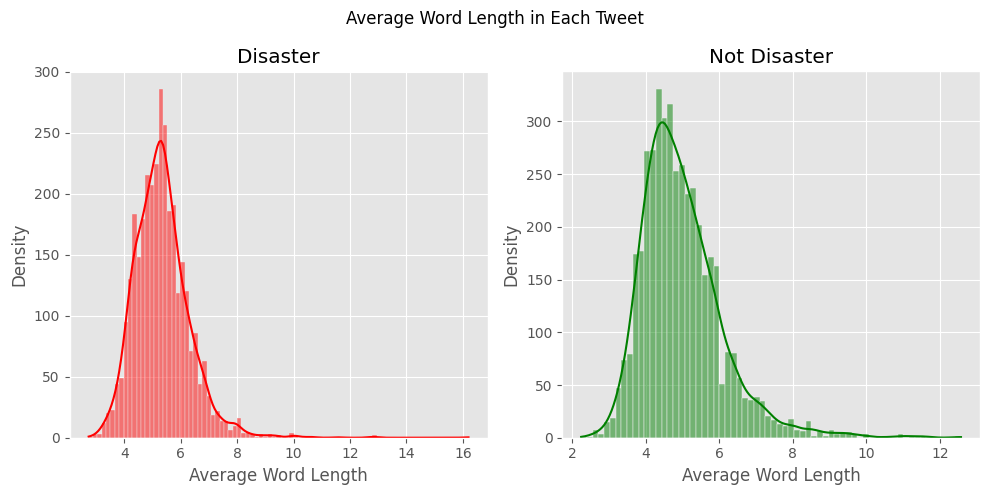

In [20]:
# Calculate the average word length for each tweet
train['avg_word_length'] = train['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# Separate the data into disaster and non-disaster tweets
disaster_tweets_avg_word = train[train['target'] == 1]['avg_word_length']
non_disaster_tweets_avg_word = train[train['target'] == 0]['avg_word_length']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot for disaster tweets
sns.histplot(disaster_tweets_avg_word, kde=True, ax=ax1, color='red')
ax1.set_title('Disaster')
ax1.set_xlabel('Average Word Length')
ax1.set_ylabel('Density')

# Plot for non-disaster tweets
sns.histplot(non_disaster_tweets_avg_word, kde=True, ax=ax2, color='green')
ax2.set_title('Not Disaster')
ax2.set_xlabel('Average Word Length')
ax2.set_ylabel('Density')

# Set the main title
fig.suptitle('Average Word Length in Each Tweet')

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
def create_corpus(target):
    corpus=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

♻️ Stopwords les plus communs dans les tweets

In [22]:
# Create corpus for non-disaster tweets
non_disaster_corpus = create_corpus(0)
disaster_corpus = create_corpus(1)

# Count stopwords in non-disaster tweets
dic_non_disaster = defaultdict(int)
for word in non_disaster_corpus:
    if word in stop:
        dic_non_disaster[word] += 1

non_disaster_top = sorted(dic_non_disaster.items(), key=lambda x: x[1], reverse=True)[:10]

# Count stopwords in disaster tweets
dic_disaster = defaultdict(int)
for word in disaster_corpus:
    if word in stop:
        dic_disaster[word] += 1

disaster_top = sorted(dic_disaster.items(), key=lambda x: x[1], reverse=True)[:10]

# Prepare data for plotting
x_non_disaster, y_non_disaster = zip(*non_disaster_top)
x_disaster, y_disaster = zip(*disaster_top)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Non-Disaster Tweets', 'Disaster Tweets'))

# Add bar chart for non-disaster tweets
fig.add_trace(go.Bar(x=x_non_disaster, y=y_non_disaster, name='Non-Disaster', marker_color='green'), row=1, col=1)

# Add bar chart for disaster tweets
fig.add_trace(go.Bar(x=x_disaster, y=y_disaster, name='Disaster', marker_color='red'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Top 10 Common Stopwords in Tweets',
                  xaxis_title='Stopwords',
                  yaxis_title='Frequency',
                  showlegend=False)

fig.show()

♻️ Dans les deux cas, le stopword `"the"` domine.

♻️ Dans les tweets de non désastres (class 0), il est suivi par le stopword `"a"`.

♻️ dans les tweets de désastres (class 1), il est suivi du stopword `"in"`.

♻️ Les mots les plus communs

In [23]:
# Count most common words in non-disaster tweets
counter_non_disaster = Counter(non_disaster_corpus)
most_non_disaster = counter_non_disaster.most_common()
x_non_disaster = []
y_non_disaster = []
for word, count in most_non_disaster[:40]:
    if word not in stop:
        x_non_disaster.append(word)
        y_non_disaster.append(count)

# Count most common words in disaster tweets
counter_disaster = Counter(disaster_corpus)
most_disaster = counter_disaster.most_common()
x_disaster = []
y_disaster = []
for word, count in most_disaster[:40]:
    if word not in stop:
        x_disaster.append(word)
        y_disaster.append(count)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Non-Disaster Tweets', 'Disaster Tweets'))

# Add bar chart for non-disaster tweets
fig.add_trace(go.Bar(x=y_non_disaster, y=x_non_disaster, orientation='h', name='Non-Disaster', marker_color='green'), row=1, col=1)

# Add bar chart for disaster tweets
fig.add_trace(go.Bar(x=y_disaster, y=x_disaster, orientation='h', name='Disaster', marker_color='red'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Top 40 Common Words in Tweets (Excluding Stopwords)',
                  xaxis_title='Count',
                  yaxis_title='Words',
                  showlegend=False)

fig.show()

In [24]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Create corpus for disaster and non-disaster tweets
non_disaster_corpus = train[train['target'] == 0]['text']
disaster_corpus = train[train['target'] == 1]['text']

# Get top bigrams
top_non_disaster_bigrams = get_top_tweet_bigrams(non_disaster_corpus, 10)
top_disaster_bigrams = get_top_tweet_bigrams(disaster_corpus, 10)

# Prepare data for plotting
x_non_disaster, y_non_disaster = map(list, zip(*top_non_disaster_bigrams))
x_disaster, y_disaster = map(list, zip(*top_disaster_bigrams))

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Non-Disaster Tweets', 'Disaster Tweets'))

# Add bar chart for non-disaster tweets
fig.add_trace(go.Bar(x=y_non_disaster, y=x_non_disaster, orientation='h', name='Non-Disaster', marker_color='green'), row=1, col=1)

# Add bar chart for disaster tweets
fig.add_trace(go.Bar(x=y_disaster, y=x_disaster, orientation='h', name='Disaster', marker_color='red'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Top 10 Bigrams in Tweets',
                  xaxis_title='Count',
                  yaxis_title='Bigrams',
                  showlegend=False)

fig.show()

In [25]:
def get_top_tweet_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top trigrams
top_non_disaster_trigrams = get_top_tweet_trigrams(non_disaster_corpus, 10)
top_disaster_trigrams = get_top_tweet_trigrams(disaster_corpus, 10)

# Prepare data for plotting
x_non_disaster_tri, y_non_disaster_tri = map(list, zip(*top_non_disaster_trigrams))
x_disaster_tri, y_disaster_tri = map(list, zip(*top_disaster_trigrams))

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Non-Disaster Tweets', 'Disaster Tweets'))

# Add bar chart for non-disaster tweets
fig.add_trace(go.Bar(x=y_non_disaster_tri, y=x_non_disaster_tri, orientation='h', name='Non-Disaster', marker_color='blue'), row=1, col=1)

# Add bar chart for disaster tweets
fig.add_trace(go.Bar(x=y_disaster_tri, y=x_disaster_tri, orientation='h', name='Disaster', marker_color='orange'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Top 10 Trigrams in Tweets',
                  xaxis_title='Count',
                  yaxis_title='Trigrams',
                  showlegend=False)

fig.show()


In [26]:
def get_top_keywords(df, n=10):
    keywords = df['keyword'].dropna()
    keyword_counts = keywords.value_counts().head(n)
    return keyword_counts

# Define non_disaster_df and disaster_df
non_disaster_df = train[train['target'] == 0]
disaster_df = train[train['target'] == 1]

# Get top keywords
top_non_disaster_keywords = get_top_keywords(non_disaster_df)
top_disaster_keywords = get_top_keywords(disaster_df)

# Prepare data for plotting
x_non_disaster_kw, y_non_disaster_kw = top_non_disaster_keywords.index, top_non_disaster_keywords.values
x_disaster_kw, y_disaster_kw = top_disaster_keywords.index, top_disaster_keywords.values

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Non-Disaster Keywords', 'Disaster Keywords'))

# Add bar chart for non-disaster keywords
fig.add_trace(go.Bar(x=y_non_disaster_kw, y=x_non_disaster_kw, orientation='h', name='Non-Disaster', marker_color='blue'), row=1, col=1)

# Add bar chart for disaster keywords
fig.add_trace(go.Bar(x=y_disaster_kw, y=x_disaster_kw, orientation='h', name='Disaster', marker_color='orange'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Top 10 Keywords in Tweets',
                  xaxis_title='Count',
                  yaxis_title='Keywords',
                  showlegend=False)

fig.show()


In [27]:
def get_top_locations(df, n=10):
    locations = df['location'].dropna()
    location_counts = locations.value_counts().head(n)
    return location_counts

# Get top locations
top_non_disaster_locations = get_top_locations(non_disaster_df)
top_disaster_locations = get_top_locations(disaster_df)

# Prepare data for plotting
x_non_disaster_loc, y_non_disaster_loc = top_non_disaster_locations.index, top_non_disaster_locations.values
x_disaster_loc, y_disaster_loc = top_disaster_locations.index, top_disaster_locations.values

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Non-Disaster Locations', 'Disaster Locations'))

# Add bar chart for non-disaster locations
fig.add_trace(go.Bar(x=y_non_disaster_loc, y=x_non_disaster_loc, orientation='h', name='Non-Disaster', marker_color='blue'), row=1, col=1)

# Add bar chart for disaster locations
fig.add_trace(go.Bar(x=y_disaster_loc, y=x_disaster_loc, orientation='h', name='Disaster', marker_color='orange'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Top 10 Locations in Tweets',
                  xaxis_title='Count',
                  yaxis_title='Locations',
                  showlegend=False)

fig.show()


In [28]:
def get_top_words(text_series, n=10):
    all_words = ' '.join(text_series.dropna().values).split()
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(n)
    return zip(*top_words)

# Get top words for non-disaster and disaster tweets
x_non_disaster_words, y_non_disaster_words = get_top_words(non_disaster_df['text'])
x_disaster_words, y_disaster_words = get_top_words(disaster_df['text'])

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Non-Disaster Words', 'Disaster Words'))

# Add bar chart for non-disaster words
fig.add_trace(go.Bar(x=y_non_disaster_words, y=x_non_disaster_words, orientation='h', name='Non-Disaster', marker_color='blue'), row=1, col=1)

# Add bar chart for disaster words
fig.add_trace(go.Bar(x=y_disaster_words, y=x_disaster_words, orientation='h', name='Disaster', marker_color='orange'), row=1, col=2)

# Update layout
fig.update_layout(title_text='Top 10 Most Common Words in Tweets',
                  xaxis_title='Count',
                  yaxis_title='Words',
                  showlegend=False)

fig.show()



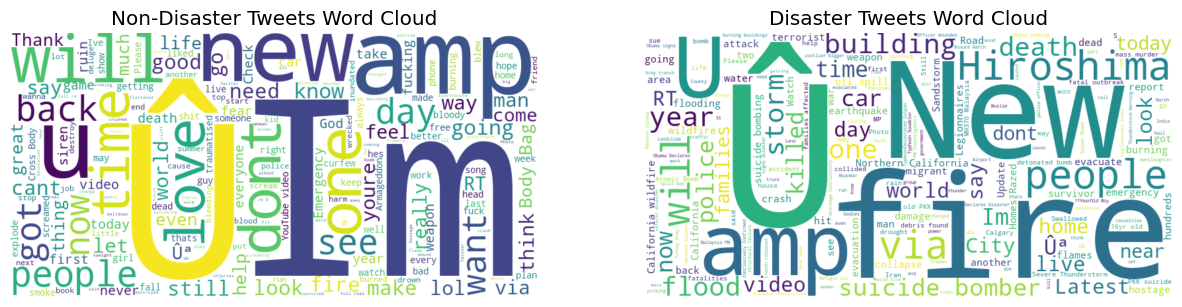

In [29]:
# Generate word cloud for non-disaster tweets
non_disaster_text = ' '.join(non_disaster_df['text'].dropna().values)
non_disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_text)

# Generate word cloud for disaster tweets
disaster_text = ' '.join(disaster_df['text'].dropna().values)
disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disaster_text)

# Plot the word clouds
plt.figure(figsize=(15, 8))

# Non-disaster word cloud
plt.subplot(1, 2, 1)
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.title('Non-Disaster Tweets Word Cloud')
plt.axis('off')

# Disaster word cloud
plt.subplot(1, 2, 2)
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.title('Disaster Tweets Word Cloud')
plt.axis('off')

plt.show()


<a id="2"></a> 
#### 1. Exercice 1 La bibliothèque PIL [⏮️](#1)[👆🏽](#0)[⏭️](#3)

<a id="3"></a> 
#### 2. Exercice 2 Numpy, MatplotLib [⏮️](#2)[👆🏽](#0)[⏭️](#4)

<a id="4"></a> 
#### 3. Exercice 3 ScikitLearn [⏮️](#3)[👆🏽](#0)[⏭️](#5)

<a id="8"></a> 
#### 4. Exercice 4 Scipy [⏮️](#3)[👆🏽](#0)[⏭️](#5)

<a id="5"></a> 
#### Conclusion [⏮️](#4)[👆🏽](#0)[⏭️](#6)

<a id="6"></a> 
#### <i>References</i> [⏮️](#5)[👆🏽](#0)[⏭️](#7)

Here is some text with a reference to the [Python documentation](https://docs.python.org/).

...

Here are some references for more information on the libraries used:

- [Pandas documentation](https://pandas.pydata.org/docs/)
- [NumPy documentation](https://numpy.org/doc/stable/)

<a id="7"></a> 
#### <i>Authors</i> [⏮️](#6)[👆🏽](#0)[⏭️]()

🍀 Auteurs
- 🧑🏾‍💻 Kikia DIA
- 🧑🏾‍💻 Mouhamadou Naby DIA
- 🧑🏾‍💻 Ndeye Awa SALANE

🍀 Affiliations
- 🎓 Ecole Polytechnique de THIES

🍀 Département 
- 💻 Genie Informatique et Telecoms

🍀 Niveau
- 📚 DIC2